In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')
train.shape

(1460, 81)

In [3]:
original_train = train.copy()

In [4]:
test = pd.read_csv('test.csv')
test.shape

(1459, 80)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
SalePrice = train['SalePrice']
train = train.drop(['SalePrice'], axis = 1)

In [8]:
all_df = pd.concat([train, test], ignore_index=True)
all_df.shape

(2919, 80)

In [9]:
# find sum of missing value of each feature.
all_df.isnull().sum(axis = 0).sort_values(ascending = False).head(25)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
dtype: int64

In [10]:
# find numerical features based on data description.
numerical_columns = original_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                                    'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                                    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                                    'PoolArea', 'MiscVal', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 
                                    'YrSold', 'SalePrice']].copy()

In [11]:
# Calculate correlations between numerical features and SalePrice. 
# Find the features with correlation greater than absolute value of 0.5
corr = numerical_columns.corr()
high_corr_columns = corr.index[abs(corr["SalePrice"])>0.5]

In [12]:
high_corr_columns

Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'SalePrice'],
      dtype='object')

In [13]:
all_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
# check value counts of each categorical feature
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
               'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',  
                     'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
               'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 
               'BsmtCond', 'BsmtQual', 'MasVnrType'
              ]

for feature in categorical_columns:
    print(all_df[feature].value_counts())
    print('')

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Pave    2907
Grvl      12
Name: Street, dtype: int64

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timb

In [15]:
# drop numerical features that have low correlations with SalePrice
# drop features have more than 200 missing values
# drop 'Utilities' and 'Street'
all_df = all_df.drop(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 
                    'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 
                    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'GarageYrBlt', 'MoSold', 
                    'YrSold', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',  
                     'Utilities', 'Street'], axis = 1)

In [16]:
all_df.shape

(2919, 51)

In [17]:
all_df.isnull().sum(axis = 0).sort_values(ascending = False).head(25)

GarageCond      159
GarageQual      159
GarageFinish    159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MSZoning          4
Functional        2
TotalBsmtSF       1
Exterior1st       1
Exterior2nd       1
SaleType          1
Electrical        1
KitchenQual       1
GarageArea        1
GarageCars        1
YearRemodAdd      0
MSSubClass        0
OverallCond       0
OverallQual       0
HouseStyle        0
dtype: int64

In [18]:
# fill in data to null values of munerical features
all_df['TotalBsmtSF'] = all_df['TotalBsmtSF'].fillna(all_df['TotalBsmtSF'].mean())
all_df['GarageArea'] = all_df['GarageArea'].fillna(all_df['GarageArea'].mean())
all_df['GarageCars'] = all_df['GarageCars'].fillna(all_df['GarageCars'].mode().iloc[0])

In [19]:
# fill 'NA' to null values of categorical features
all_df = all_df.fillna('NA')

In [20]:
# plot outliers of numerical features.
numerical_features = original_train[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 
                                     'GarageArea']].copy()

numerical_features.head()

,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,856,856,1710,2,8,2,548
1,1262,1262,1262,2,6,2,460
2,920,920,1786,2,6,2,608
3,756,961,1717,1,7,3,642
4,1145,1145,2198,2,9,3,836


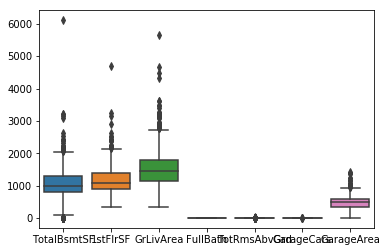

In [21]:
sns.boxplot(data = numerical_features)
plt.show()

In [22]:
numerical_features.sort_values('GrLivArea', ascending = False).head()

,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
1298,6110,4692,5642,2,12,2,1418
523,3138,3138,4676,3,11,3,884
1182,2396,2411,4476,3,10,3,813
691,2444,2444,4316,3,10,3,832
1169,1930,1831,3627,3,10,3,807


In [23]:
all_df = all_df.drop([1298, 1182, 691, 523])
all_df.shape

(2915, 51)

In [24]:
# delete the same from sale price
SalePrice = SalePrice.drop([1298, 1182, 691, 523])

In [25]:
dummify_list = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

all_df = pd.get_dummies(all_df, columns = dummify_list, drop_first = True)

In [26]:
# split the Concatenated data back to train and test.
# set column 'Id' as index
test = all_df.iloc[1456 : , :]
test.set_index('Id').head(3)

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSSubClass_30,...,SaleType_ConLw,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,1961,1961,882.0,896,896,1,5,1.0,730.0,0,...,0,0,0,0,1,0,0,0,1,0
1462,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,0,...,0,0,0,0,1,0,0,0,1,0
1463,1997,1998,928.0,928,1629,2,6,2.0,482.0,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
X = all_df.iloc[ : 1456, :]
X.set_index('Id').head(3)

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSSubClass_30,...,SaleType_ConLw,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,2003,2003,856.0,856,1710,2,8,2.0,548.0,0,...,0,0,0,0,1,0,0,0,1,0
2,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,0,...,0,0,0,0,1,0,0,0,1,0
3,2001,2002,920.0,920,1786,2,6,2.0,608.0,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
# Split data to train and test by 70/30
X_train, X_test, y_train, y_test = train_test_split(X, SalePrice, test_size=0.3)

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [31]:
MLR = LinearRegression()
Ridge = Ridge()
Lasso = Lasso()
ElasticNet = ElasticNet()
Logit = LogisticRegression()
LDA  = LinearDiscriminantAnalysis()
GNB  = GaussianNB()
MNB  = MultinomialNB()
Forest = RandomForestRegressor()
GBR = GradientBoostingRegressor()
SVM = SVR(kernel='linear')

In [32]:
model_list = [MLR, Ridge, Lasso, ElasticNet, Logit, LDA, GNB, MNB, Forest, GBR, SVM]
modelSeries = pd.Series(model_list, index=['MLR', 'Ridge', 'Lasso', 'ElasticNet', 'Logit', 'LDA', 'GNB', 'MNB', 
                                          'Forest', 'GBR', 'SVM'])

In [33]:
modelSeries.apply(lambda x : x.fit(X_train, y_train))

C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Cassandra Jones\Anaco

MLR           LinearRegression(copy_X=True, fit_intercept=Tr...
Ridge         Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...
Lasso         Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...
ElasticNet    ElasticNet(alpha=1.0, copy_X=True, fit_interce...
Logit         LogisticRegression(C=1.0, class_weight=None, d...
LDA           LinearDiscriminantAnalysis(n_components=None, ...
GNB                GaussianNB(priors=None, var_smoothing=1e-09)
MNB           MultinomialNB(alpha=1.0, class_prior=None, fit...
Forest        (DecisionTreeRegressor(criterion='mse', max_de...
GBR           ([DecisionTreeRegressor(criterion='friedman_ms...
SVM           SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...
dtype: object

In [34]:
scores = modelSeries.apply(lambda x : pd.Series([x.score(X_train, y_train), x.score(X_test, y_test)]))
scores.columns = ['train score', 'test score']
scores

,train score,test score
MLR,0.944749,0.867603
Ridge,0.942440,0.881798
Lasso,0.944679,0.870317
ElasticNet,0.844863,0.813756
Logit,0.974485,0.009153
LDA,0.887144,0.009153
GNB,0.926398,0.009153
MNB,0.117763,0.011442
Forest,0.972725,0.841570
GBR,0.962181,0.884512


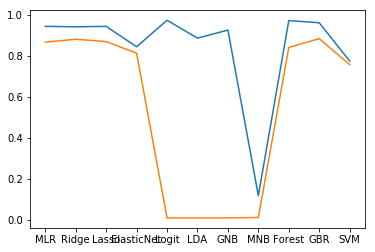

In [35]:
plt.plot(scores)
plt.show()

In [36]:
# Predict test data using MLR
y_pred = MLR.predict(X_test)
MLR_sqrt_MSE = np.sqrt(mean_squared_error(y_test, y_pred))
MLR_sqrt_MSE

26616.331247769485

In [37]:
# set different hyperparameter alphas and find the minimum MSE of ridge regression

alpha_range = np.linspace(1e-3,100,20)

ridge_sqrt_MSE = []

for alpha in alpha_range:
    Ridge.set_params(alpha = alpha)
    Ridge.fit(X_train, y_train)
    y_pred = Ridge.predict(X_test)
    ridge_sqrt_MSE.append([alpha, np.sqrt(mean_squared_error(y_test, y_pred))])

ridge_df = pd.DataFrame(ridge_sqrt_MSE, columns=["Alpha", "sqrt_MSE"])
print(ridge_df[ridge_df.sqrt_MSE == ridge_df.sqrt_MSE.min()])

      Alpha      sqrt_MSE
1  5.264105  24760.126799


Text(0.5, 1.0, 'Ridge - Change of sqrt of MSE with Different Alpha')

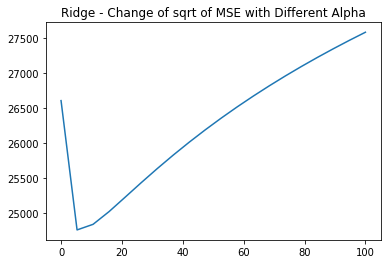

In [41]:
plt.plot(ridge_df.Alpha, ridge_df.sqrt_MSE)
plt.title('Ridge - Change of sqrt of MSE with Different Alpha')

In [42]:
# set different hyperparameter alphas and find the minimum MSE of lasso regression

lasso_sqrt_MSE = []

for alpha in alpha_range:
    Lasso.set_params(alpha = alpha)
    Lasso.fit(X_train, y_train)
    y_pred = Lasso.predict(X_test)
    lasso_sqrt_MSE.append([alpha, np.sqrt(mean_squared_error(y_test, y_pred))])

lasso_df = pd.DataFrame(lasso_sqrt_MSE, columns=["Alpha", "sqrt_MSE"])
print(lasso_df[lasso_df.sqrt_MSE == lasso_df.sqrt_MSE.min()])

C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


        Alpha      sqrt_MSE
17  89.473789  24061.886793


Text(0.5, 1.0, 'Lasso - Change of sqrt of MSE with Different Alpha')

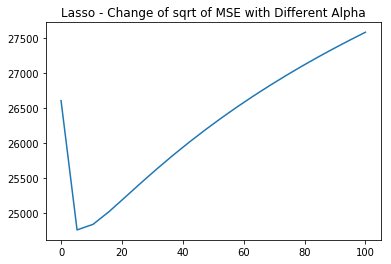

In [43]:
plt.plot(lasso_df.Alpha, ridge_df.sqrt_MSE)
plt.title('Lasso - Change of sqrt of MSE with Different Alpha')

In [44]:
# test gradient boosting with learning rates: 1, 0.1, 0.01
n_estimators = 50100
steps = range(100, 50100, 1000)

GBR.set_params(learning_rate = 1, n_estimators=n_estimators)
GBR.fit(X_train, y_train)
gen = GBR.staged_predict(X_test)
sqrt_MSE_rate1 = []

for n in range(n_estimators):
           y_pred = next(gen)
           if n not in steps: continue
           sqrt_MSE_rate1.append([n, np.sqrt(mean_squared_error(y_test, y_pred))])

In [45]:
GBR.set_params(learning_rate = 0.1, n_estimators=n_estimators)
GBR.fit(X_train, y_train)
gen = GBR.staged_predict(X_test)
sqrt_MSE_rate01 = []

for n in range(n_estimators):
           y_pred = next(gen)
           if n not in steps: continue
           sqrt_MSE_rate01.append([n, np.sqrt(mean_squared_error(y_test, y_pred))])

In [46]:
GBR.set_params(learning_rate = 0.01, n_estimators=n_estimators)
GBR.fit(X_train, y_train)
gen = GBR.staged_predict(X_test)
sqrt_MSE_rate001 = []

for n in range(n_estimators):
           y_pred = next(gen)
           if n not in steps: continue
           sqrt_MSE_rate001.append([n, np.sqrt(mean_squared_error(y_test, y_pred))])

In [47]:
GBR_rate1_df = pd.DataFrame(sqrt_MSE_rate1, columns=["n_estimators", "sqrt_MSE"])
GBR_rate01_df = pd.DataFrame(sqrt_MSE_rate01, columns=["n_estimators", "sqrt_MSE"])
GBR_rate001_df = pd.DataFrame(sqrt_MSE_rate001, columns=["n_estimators", "sqrt_MSE"])
print(GBR_rate1_df[GBR_rate1_df.sqrt_MSE == GBR_rate1_df.sqrt_MSE.min()])
print(GBR_rate01_df[GBR_rate01_df.sqrt_MSE == GBR_rate01_df.sqrt_MSE.min()])
print(GBR_rate001_df[GBR_rate001_df.sqrt_MSE == GBR_rate001_df.sqrt_MSE.min()])

    n_estimators      sqrt_MSE
49         49100  36379.182039
   n_estimators      sqrt_MSE
1          1100  23524.684879
    n_estimators      sqrt_MSE
15         15100  23201.064747


Text(0, 0.5, 'sqrt_MSE')

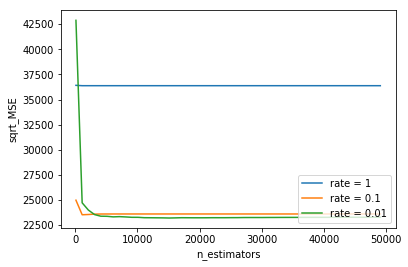

In [48]:
plt.plot(steps, GBR_rate1_df.sqrt_MSE, label = 'rate = 1')
plt.plot(steps, GBR_rate01_df.sqrt_MSE, label = 'rate = 0.1')
plt.plot(steps, GBR_rate001_df.sqrt_MSE, label = 'rate = 0.01')
plt.legend(loc=4)
plt.xlabel('n_estimators')
plt.ylabel('sqrt_MSE')

In [49]:
test.shape

(1459, 262)

In [50]:
# GBR has the lowest sqrt of MSE. I would use this model to predict the final test data.

GBR.set_params(learning_rate = 0.01, n_estimators=15100)
GBR.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=15100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
price = GBR.predict(test)

In [52]:
submission = pd.DataFrame({
        "Id": test.Id,
        "SalePrice": price
    })

In [53]:
submission.to_csv('submission.csv', index=False)